In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random

In [31]:
# Reference data files *** USE ONLY ONE FILE IF ONLY ADDRESSING ONE QUESTION ***
data_path = "output_data/crime_weather_merged.csv"

# Read the data files 
data = pd.read_csv(data_path)

#View data
data.tail()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%)
27556,27556,2023,2023-02-05,23:00:00,11:00PM,violent,assault w/dangerous weapon,assault w/dangerous weapon,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27557,27557,2023,2023-02-05,23:00:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27558,27558,2023,2023-02-05,23:21:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27559,27559,2023,2023-02-05,23:40:00,11:00PM,property,motor vehicle theft,motor vehicle theft,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0
27560,27560,2023,2023-02-05,23:55:00,11:00PM,property,theft f/auto,theft f/auto,50.9,30.0,41.1,0.0,61.0,Overcast,42.5,Mist,0.0,95.0


In [32]:
#View data types
data.dtypes

ID                            int64
Year                          int64
Start Date                   object
Start Time                   object
Hour                         object
Offense Group                object
Offense                      object
Offense Text                 object
Max Temp (f)                float64
Min Temp (f)                float64
Avg Temp (f)                float64
Total Precipitation (in)    float64
Avg Humidity (%)            float64
Day Condition                object
Hour Temp (f)               float64
Hour Condition               object
Hour Precipitation (in)     float64
Hour Humidity (%)           float64
dtype: object

In [33]:
#Group data by Hour Temp
crime_by_temp = data.groupby("Hour Temp (f)").count()["ID"]

#Group data by Hour Humidity
crime_by_humid = data.groupby("Hour Humidity (%)").count()["ID"]

#Group data by Hour Precip
crime_by_precip = data.groupby("Hour Precipitation (in)").count()["ID"]

#Group data by Hour Condition
crime_by_cond = data.groupby("Hour Condition").count()["ID"]

crime_by_humid

Hour Humidity (%)
20.0       5
21.0      10
22.0      20
23.0      40
24.0      48
        ... 
96.0     379
97.0     340
98.0     368
99.0     237
100.0     56
Name: ID, Length: 81, dtype: int64

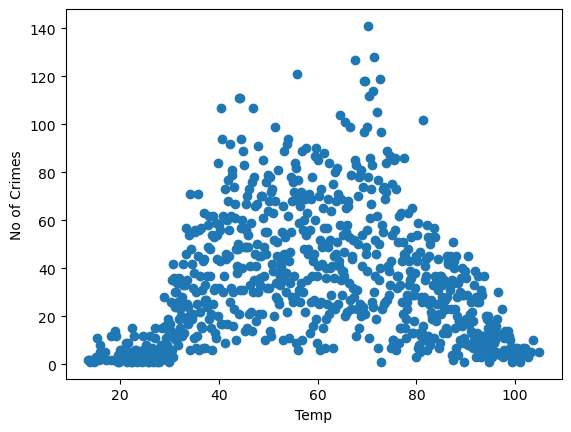

In [34]:
plt.scatter(crime_by_temp.index,crime_by_temp.values)
plt.xlabel('Temp')
plt.ylabel('No of Crimes')
plt.show()

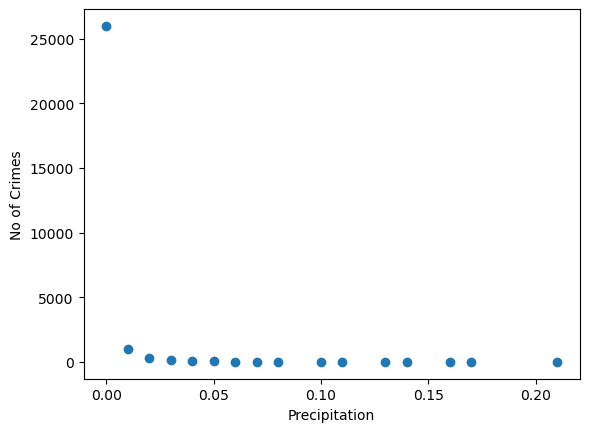

In [35]:
plt.scatter(crime_by_precip.index,crime_by_precip.values)
plt.xlabel('Precipitation')
plt.ylabel('No of Crimes')
plt.show()

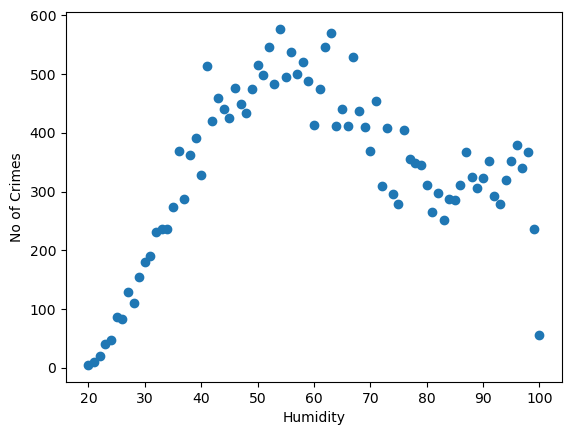

In [36]:
plt.scatter(crime_by_humid.index,crime_by_humid.values)
plt.xlabel('Humidity')
plt.ylabel('No of Crimes')
plt.show()

In [37]:
plt.scatter(crime_by_temp.iloc[:,5],data.iloc[:,14])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

IndexingError: Too many indexers

In [38]:
temp_condition = (data["Hour Temp (f)"]>40.0) & (data["Hour Temp (f)"]<80.0)
humid_condition = (data["Hour Humidity (%)"]>50.0) & (data["Hour Humidity (%)"]<80.0)
precip_condition = (data["Hour Precipitation (in)"]<0.02)
data_filter = data.loc[temp_condition & humid_condition & precip_condition]
data_filter.head()

,ID,Year,Start Date,Start Time,Hour,Offense Group,Offense,Offense Text,Max Temp (f),Min Temp (f),Avg Temp (f),Total Precipitation (in),Avg Humidity (%),Day Condition,Hour Temp (f),Hour Condition,Hour Precipitation (in),Hour Humidity (%)
110,110,2022,2022-02-07,18:00:00,6:00PM,property,theft f/auto,theft f/auto,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
111,111,2022,2022-02-07,18:48:00,6:00PM,property,theft/other,theft/other,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
112,112,2022,2022-02-07,18:53:00,6:00PM,property,motor vehicle theft,motor vehicle theft,46.9,27.7,38.0,0.0,61.0,Cloudy,43.7,Clear,0.0,51.0
113,113,2022,2022-02-07,19:00:00,7:00PM,property,theft f/auto,theft f/auto,46.9,27.7,38.0,0.0,61.0,Cloudy,41.2,Clear,0.0,56.0
114,114,2022,2022-02-07,19:17:00,7:00PM,property,motor vehicle theft,motor vehicle theft,46.9,27.7,38.0,0.0,61.0,Cloudy,41.2,Clear,0.0,56.0


In [39]:
data["Hour Temp (f)"]>40.0


0        False
1        False
2        False
3        False
4        False
         ...  
27556     True
27557     True
27558     True
27559     True
27560     True
Name: Hour Temp (f), Length: 27561, dtype: bool

In [40]:
#Group data by Hour Temp
crime_by_temp2 = data_filter.groupby("Hour Temp (f)").count()["ID"]

#Group data by Hour Humidity
crime_by_humid2 = data_filter.groupby("Hour Humidity (%)").count()["ID"]

#Group data by Hour Precip
crime_by_precip2 = data_filter.groupby("Hour Precipitation (in)").count()["ID"]

#Group data by Hour Condition
crime_by_cond2 = data_filter.groupby("Hour Condition").count()["ID"]

crime_by_humid2

Hour Humidity (%)
51.0    327
52.0    330
53.0    284
54.0    370
55.0    342
56.0    354
57.0    366
58.0    356
59.0    342
60.0    296
61.0    348
62.0    381
63.0    378
64.0    273
65.0    287
66.0    316
67.0    387
68.0    322
69.0    332
70.0    279
71.0    412
72.0    234
73.0    337
74.0    218
75.0    250
76.0    361
77.0    287
78.0    304
79.0    301
Name: ID, dtype: int64

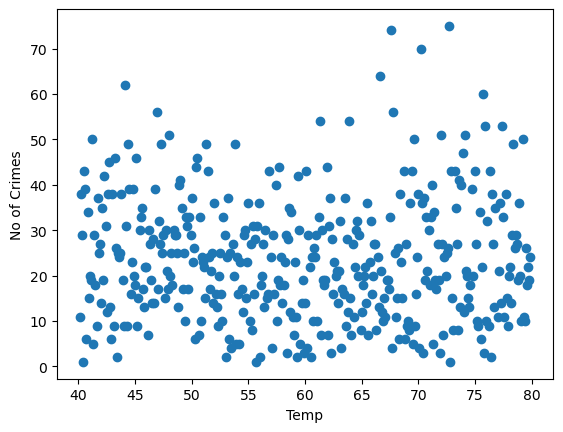

In [41]:
plt.scatter(crime_by_temp2.index,crime_by_temp2.values)
plt.xlabel('Temp')
plt.ylabel('No of Crimes')
plt.show()

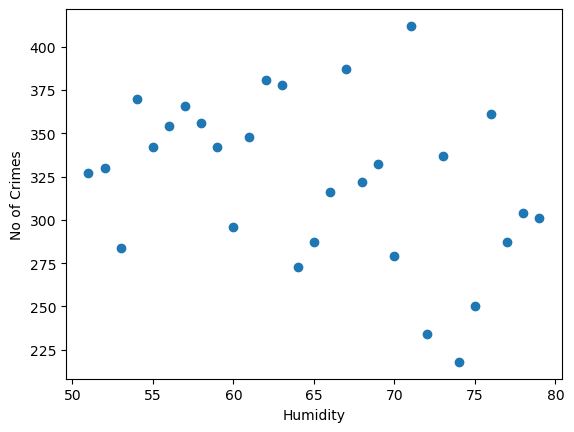

In [42]:
plt.scatter(crime_by_humid2.index,crime_by_humid2.values)
plt.xlabel('Humidity')
plt.ylabel('No of Crimes')
plt.show()

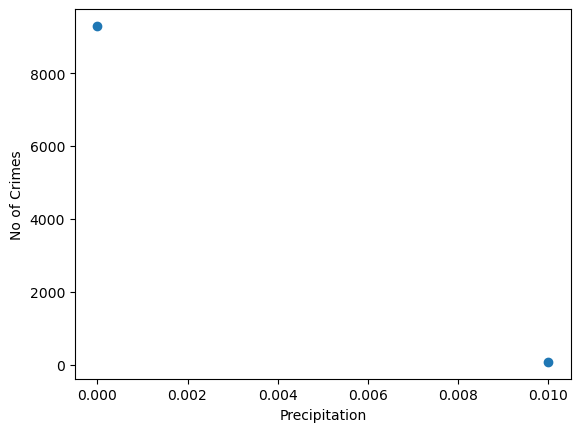

In [43]:
plt.scatter(crime_by_precip2.index,crime_by_precip2.values)
plt.xlabel('Precipitation')
plt.ylabel('No of Crimes')
plt.show()

# Testing Correlation Between Precipitation and Crime

In [44]:
# Finding average motor vehicle and theft f/auto crime per day precipitation vs. no precipitation
data_limited = pd.DataFrame(data.loc[(data['Offense Text'] == 'motor vehicle theft') | (data['Offense Text'] == 'theft f/auto'), :])
precip_col = np.where((data_limited['Total Precipitation (in)']) > 0, 'Precipitation', 'No Precipitation')
data_limited['Precipitation'] = precip_col
data_limited.groupby(['Precipitation', 'Start Date']).count()

no_precip = data_limited.loc[data_limited['Precipitation'] == 'No Precipitation', :]
no_precip_group = pd.DataFrame(no_precip.groupby('Start Date').count())
avg_crime_no_precip = (no_precip_group['ID']).mean()
print(f"The average crimes per day with no precipitation: {avg_crime_no_precip}")

precip = data_limited.loc[data_limited['Precipitation'] == 'Precipitation', :]
precip_group = pd.DataFrame(precip.groupby('Start Date').count())
avg_crime_precip = (precip_group['ID']).mean()
avg_crime_precip
print(f"The average crimes per day with precipitation: {avg_crime_precip}")



The average crimes per day with no precipitation: 33.11914893617021
The average crimes per day with precipitation: 31.976923076923075


In [45]:
# Chi-Squared Analysis
observed = pd.Series([33.11914893617021, 31.976923076923075], index=['Precipitation', 'No Precipitation'])
chi_df = pd.DataFrame([observed]).T

# Expected avg crime per day
grouped = pd.DataFrame(data_limited.groupby('Start Date').count())
avg_crime_total = grouped['ID'].mean()
print(f"Average crime over all 365 days: {avg_crime_total}")

# Column of expected values
chi_df[1] = avg_crime_total
chi_df.columns = ['observed', 'expected']

# Degrees of freedom 2 - 1 = 1
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = 1)
critical_value


Average crime over all 365 days: 32.71232876712329


3.841458820694124

In [46]:
# Chi Squared
st.chisquare(chi_df['observed'], chi_df['expected'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.00504770120518478

<BarContainer object of 2 artists>

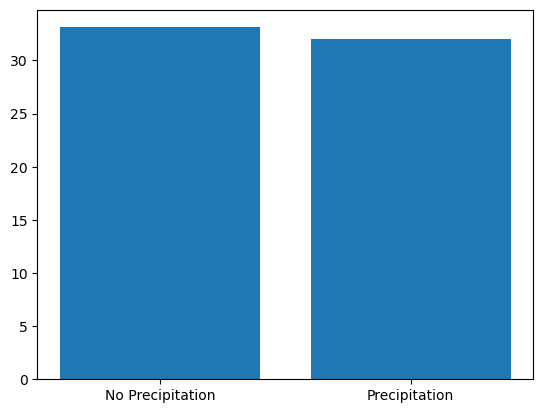

In [47]:
# Visualization
x_axis = ['No Precipitation', "Precipitation"]
y_axis = [avg_crime_no_precip, avg_crime_precip]
plt.bar(x_axis, y_axis)
# plt.title("""Total Number of Crimes Reported
# Precipitation vs. No Precipitation""")
# plt.xticks(tick_locations, precip)
# plt.xlabel('Precipitation')
# plt.ylabel('Crimes Reported')
# plt.ylim(top=30000)
# for index,data in enumerate((crime_weather.groupby(precip_col).count()['ID'])):
#     plt.text(x=index , y=data+250 , s=f"{data}", ha='center')
# plt.show()


# Testing Correlation Between Temperature and Crime

The lower quartile is 46.7
The upper quartile is 76.0


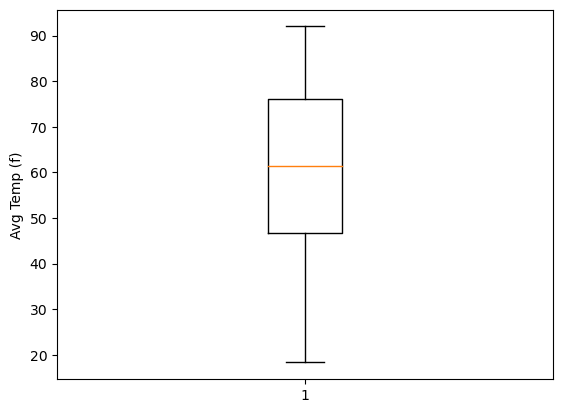

In [49]:
# Identify low, moderate, high temperatures
# weather_file = "output_data/dc_weather.csv"
# weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avgtemp_f'].quantile([.25, .50, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Temp (f)')
ax1.boxplot(weather_day['avgtemp_f'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [50]:
bins = [0, 46.7, 76, 100]
bin_labels = ['low', 'moderate', 'high']

# organize weather by bins
data_limited['Temperature Level'] = pd.cut(data_limited['Avg Temp (f)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low temperature
low_weather = data_limited.loc[data_limited['Temperature Level'] == 'low', :]
low_group = pd.DataFrame(low_weather.groupby('Start Date').count())
avg_crime_low = (low_group['ID']).mean()
print(f"The average crimes per day with low temperature: {avg_crime_low}")

# Avg crime per day moderate temperature
mod_weather = data_limited.loc[data_limited['Temperature Level'] == 'moderate', :]
mod_group = pd.DataFrame(mod_weather.groupby('Start Date').count())
avg_crime_mod = (mod_group['ID']).mean()
print(f"The average crimes per day with moderate temperature: {avg_crime_mod}")

# Avg crime per day high temperature
high_weather = data_limited.loc[data_limited['Temperature Level'] == 'high', :]
high_group = pd.DataFrame(high_weather.groupby('Start Date').count())
avg_crime_high = (high_group['ID']).mean()
print(f"The average crimes per day with high temperature: {avg_crime_high}")


The average crimes per day with low temperature: 34.48913043478261
The average crimes per day with moderate temperature: 31.715846994535518
The average crimes per day with high temperature: 32.922222222222224


In [51]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_sample = random.sample(list(low_group['ID']), k=50)
mod_sample = random.sample(list(mod_group['ID']), k=50)
high_sample = random.sample(list(high_group['ID']), k=50)
st.f_oneway(low_sample, mod_sample, high_sample)




F_onewayResult(statistic=3.3328817075792263, pvalue=0.038406606834932404)

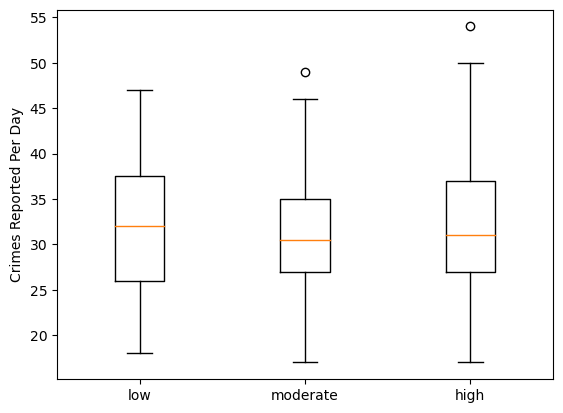

In [22]:
# Box plot
box_plot = []
box_plot.append(low_sample)
box_plot.append(mod_sample)
box_plot.append(high_sample)

temperature_label = ['low', 'moderate', 'high']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

# Testing Correlation Between Humidity and Crime

The lower quartile is 55.0
The upper quartile is 76.0


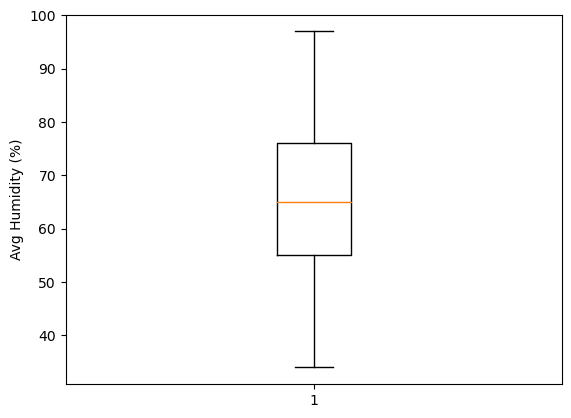

In [23]:
# Identify low, moderate, high humidity levels
weather_file = "output_data/dc_weather.csv"
weather_day = pd.read_csv(weather_file)

quartiles = weather_day['avghumidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Avg Humidity (%)')
ax1.boxplot(weather_day['avghumidity'])
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()

In [52]:
bins = [0, 54.9, 75.9, 100]
bin_labels = ['low humidity', 'moderate humidity', 'high humidity']

# organize weather by bins
data_limited['Humidity Level'] = pd.cut(data_limited['Avg Humidity (%)'], bins, labels=bin_labels, include_lowest=True)

# Avg crime per day low humidity
low_humidity = data_limited.loc[data_limited['Humidity Level'] == 'low humidity', :]
low_humidity_group = pd.DataFrame(low_humidity.groupby('Start Date').count())
avg_crime_low_humidity = (low_humidity_group['ID']).mean()
print(f"The average crimes per day with low humidity: {avg_crime_low_humidity}")

# Avg crime per day moderate humidity
mod_humidity = data_limited.loc[data_limited['Humidity Level'] == 'moderate humidity', :]
mod_humidity_group = pd.DataFrame(mod_humidity.groupby('Start Date').count())
avg_crime_mod_humidity = (mod_humidity_group['ID']).mean()
print(f"The average crimes per day with moderate humidity: {avg_crime_mod_humidity}")

# Avg crime per day high humidity
high_humidity = data_limited.loc[data_limited['Humidity Level'] == 'high humidity', :]
high_humidity_group = pd.DataFrame(high_humidity.groupby('Start Date').count())
avg_crime_high_humidity = (high_humidity_group['ID']).mean()
print(f"The average crimes per day with high humidity: {avg_crime_high_humidity}")

The average crimes per day with low humidity: 32.9277108433735
The average crimes per day with moderate humidity: 32.481283422459896
The average crimes per day with high humidity: 32.97894736842105


In [25]:
# One-way ANOVA Test
# Perform the ANOVA
# Take samples of 50 from each group.
low_humidity_sample = random.sample(list(low_humidity_group['ID']), k=50)
mod_humidity_sample = random.sample(list(mod_humidity_group['ID']), k=50)
high_humidity_sample = random.sample(list(high_humidity_group['ID']), k=50)
st.f_oneway(low_humidity_sample, mod_humidity_sample, high_humidity_sample)


F_onewayResult(statistic=0.24012519467427199, pvalue=0.7868372882856749)

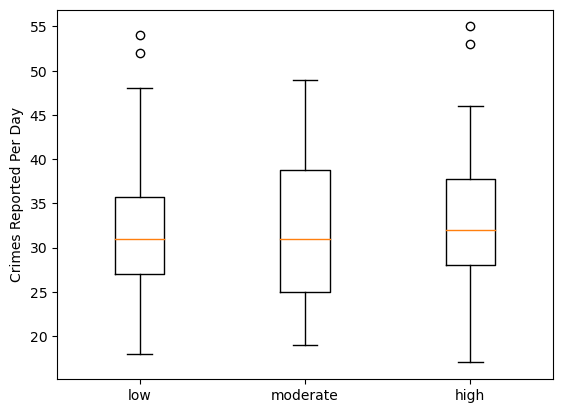

In [26]:
# Box plot
box_plot = []
box_plot.append(low_humidity_sample)
box_plot.append(mod_humidity_sample)
box_plot.append(high_humidity_sample)

humidity_label = ['low humidity', 'moderate humidity', 'high humidity']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Crimes Reported Per Day')
ax1.boxplot(box_plot, labels=temperature_label)
flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}
plt.show()